In [160]:
#importovanje biblioteka
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sn
import matplotlib.pyplot as plt

sn.set(font_scale=0.8)

In [161]:
df=pd.read_csv('bank-additional.csv',sep=';')

<b>UCITAVANJE DATASET-A</b>

In [162]:
df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487.0,2.0,999,0.0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,346.0,4.0,999,0.0,nonexistent,1.1,93.994,-36.4,4.855,5191,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,227.0,1.0,999,0.0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,17.0,3.0,999,0.0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58.0,1.0,999,0.0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
5,32,services,single,university.degree,no,no,no,cellular,sep,thu,128.0,3.0,999,2.0,failure,-1.1,94.199,-37.5,0.884,4963.6,no
6,32,admin.,single,university.degree,no,yes,no,cellular,sep,mon,290.0,4.0,999,0.0,nonexistent,-1.1,94.199,-37.5,0.879,4963.6,no
7,41,entrepreneur,married,university.degree,unknown,yes,no,cellular,nov,mon,44.0,2.0,999,0.0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
8,31,services,divorced,professional.course,no,no,no,cellular,nov,tue,68.0,1.0,999,1.0,failure,-0.1,93.200,-42.0,4.153,5195.8,no
9,35,blue-collar,married,basic.9y,unknown,no,no,telephone,may,thu,NaN,1.0,999,0.0,nonexistent,1.1,93.994,-36.4,4.855,5191,no


In [163]:
pd.set_option('display.max_columns', 21)

In [164]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487.0,2.0,999,0.0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,346.0,4.0,999,0.0,nonexistent,1.1,93.994,-36.4,4.855,5191,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,227.0,1.0,999,0.0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,17.0,3.0,999,0.0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58.0,1.0,999,0.0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [165]:
#df.rename(columns = {'y':'deposit_subscription'}, inplace = True) #Promena naziva kolone koja predstavlja izlaznu varijablu u modelima

In [166]:
df.columns = ['godine', 'tip_posla', 'bracni_status', 'obrazovanje','kasni_sa_isplatom',
              'stambeni_kredit','licni_kredit/zajam','vrsta_kontakta','mesec_poslednjeg_poziva','dan_poslednjeg_poziva',
              'trajanje_poslednjeg_poziva','puta_kontaktiran_u_kampanji','dana_od_poslednjeg_kontakta','puta_kontaktiran_u_proslosti','ishod_prethodnih_kampanja',
             'stopa_varijabiliteta_zaposlenosti','indeks_potrosackih_cena','indeks_poverenja_kupca','euribor','broj_zaposlenih','orocio_depozit']

In [167]:
df.head(20)

,godine,tip_posla,bracni_status,obrazovanje,kasni_sa_isplatom,stambeni_kredit,licni_kredit/zajam,vrsta_kontakta,mesec_poslednjeg_poziva,dan_poslednjeg_poziva,trajanje_poslednjeg_poziva,puta_kontaktiran_u_kampanji,dana_od_poslednjeg_kontakta,puta_kontaktiran_u_proslosti,ishod_prethodnih_kampanja,stopa_varijabiliteta_zaposlenosti,indeks_potrosackih_cena,indeks_poverenja_kupca,euribor,broj_zaposlenih,orocio_depozit
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487.0,2.0,999,0.0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,346.0,4.0,999,0.0,nonexistent,1.1,93.994,-36.4,4.855,5191,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,227.0,1.0,999,0.0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,17.0,3.0,999,0.0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58.0,1.0,999,0.0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
5,32,services,single,university.degree,no,no,no,cellular,sep,thu,128.0,3.0,999,2.0,failure,-1.1,94.199,-37.5,0.884,4963.6,no
6,32,admin.,single,university.degree,no,yes,no,cellular,sep,mon,290.0,4.0,999,0.0,nonexistent,-1.1,94.199,-37.5,0.879,4963.6,no
7,41,entrepreneur,married,university.degree,unknown,yes,no,cellular,nov,mon,44.0,2.0,999,0.0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
8,31,services,divorced,professional.course,no,no,no,cellular,nov,tue,68.0,1.0,999,1.0,failure,-0.1,93.200,-42.0,4.153,5195.8,no
9,35,blue-collar,married,basic.9y,unknown,no,no,telephone,may,thu,NaN,1.0,999,0.0,nonexistent,1.1,93.994,-36.4,4.855,5191,no


<b>ANALIZA SKUPA PODATAKA</b>

<b>Odredjivanje tipova podataka atributa</b>

In [168]:
a, b = df.shape
print ('Skup podataka ima {} redova i {} kolonu'.format(a,b))

#Promeni imena kolonama da bi se bolje razumeo dataset!!!!!!!

Skup podataka ima 4119 redova i 21 kolonu


In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   godine                             4119 non-null   int64  
 1   tip_posla                          4119 non-null   object 
 2   bracni_status                      4119 non-null   object 
 3   obrazovanje                        4119 non-null   object 
 4   kasni_sa_isplatom                  4119 non-null   object 
 5   stambeni_kredit                    4119 non-null   object 
 6   licni_kredit/zajam                 4119 non-null   object 
 7   vrsta_kontakta                     4119 non-null   object 
 8   mesec_poslednjeg_poziva            4119 non-null   object 
 9   dan_poslednjeg_poziva              4119 non-null   object 
 10  trajanje_poslednjeg_poziva         4116 non-null   float64
 11  puta_kontaktiran_u_kampanji        4114 non-null   float

Bitno je napomenuti da su varijable od <b>stopa_varijabiliteta_zaposlenosti</b> zakljucno sa <b>broj_zaposlenih</b> socio-ekonomski pokazatelji i da se mere za razlicite vremenske periode.Euribor se meri na <b>dnevnom</b> (iako je vrednost za tromesecje),indeks potrosackih cena i poverenja kupca se na <b>mesecnom</b>,a stopa varijabiliteta zaposlenosti na <b>tromesecnom</b> nivou.

In [170]:
df.dtypes

godine                                 int64
tip_posla                             object
bracni_status                         object
obrazovanje                           object
kasni_sa_isplatom                     object
stambeni_kredit                       object
licni_kredit/zajam                    object
vrsta_kontakta                        object
mesec_poslednjeg_poziva               object
dan_poslednjeg_poziva                 object
trajanje_poslednjeg_poziva           float64
puta_kontaktiran_u_kampanji          float64
dana_od_poslednjeg_kontakta            int64
puta_kontaktiran_u_proslosti         float64
ishod_prethodnih_kampanja             object
stopa_varijabiliteta_zaposlenosti    float64
indeks_potrosackih_cena              float64
indeks_poverenja_kupca               float64
euribor                              float64
broj_zaposlenih                       object
orocio_depozit                        object
dtype: object

Vidimo da je promenljiva <b>broj_zaposlenih</b> object tipa,iako se iz dokumantacije i intuitivno moze zakljuciti da bi trebalo da je brojevnog tipa,pa idemo u detaljniji pregled te kolone

In [171]:
df.iloc[775:782]

,godine,tip_posla,bracni_status,obrazovanje,kasni_sa_isplatom,stambeni_kredit,licni_kredit/zajam,vrsta_kontakta,mesec_poslednjeg_poziva,dan_poslednjeg_poziva,trajanje_poslednjeg_poziva,puta_kontaktiran_u_kampanji,dana_od_poslednjeg_kontakta,puta_kontaktiran_u_proslosti,ishod_prethodnih_kampanja,stopa_varijabiliteta_zaposlenosti,indeks_potrosackih_cena,indeks_poverenja_kupca,euribor,broj_zaposlenih,orocio_depozit
775,36,admin.,married,university.degree,no,no,no,cellular,may,tue,65.0,1.0,999,1.0,failure,-1.8,92.893,-46.200,1.266,5099.1,no
776,29,technician,single,university.degree,no,yes,yes,cellular,nov,thu,281.0,2.0,999,0.0,nonexistent,-0.1,93.200,-42.000,4.076,5195.8,no
777,30,admin.,single,high.school,no,unknown,unknown,cellular,nov,tue,229.0,2.0,999,0.0,nonexistent,-0.1,93.200,-42.000,4.153,5195.8,no
778,24,student,married,university.degree,no,no,no,cellular,jul,tue,114.0,1.0,999,0.0,nonexistent,1.4,93.918,-42.700,4.961,5228.1,no
779,47,admin.,single,university.degree,no,yes,no,cellular,jun,mon,243.0,4.0,999,0.0,nonexistent,-2.9,92.963,-40.800,1.281,5076.2,yes
780,32,blue-collar,married,basic.4y,no,no,yes,cellular,may,thu,80.0,4.0,999,0.0,nonexistent,-1.8,92.893,1.266,5099.100,no,NaN
781,34,technician,single,professional.course,no,no,no,cellular,aug,mon,468.0,1.0,999,0.0,nonexistent,1.4,93.444,-36.100,4.965,5228.1,no


In [172]:
df.iloc[780, 20] = 'no'
df.iloc[780, 19] = df.iloc[780, 18]
df.iloc[780, 18] = df.iloc[780, 17]
df.iloc[780,17] = np.NaN

In [173]:
df.iloc[775:782]

,godine,tip_posla,bracni_status,obrazovanje,kasni_sa_isplatom,stambeni_kredit,licni_kredit/zajam,vrsta_kontakta,mesec_poslednjeg_poziva,dan_poslednjeg_poziva,trajanje_poslednjeg_poziva,puta_kontaktiran_u_kampanji,dana_od_poslednjeg_kontakta,puta_kontaktiran_u_proslosti,ishod_prethodnih_kampanja,stopa_varijabiliteta_zaposlenosti,indeks_potrosackih_cena,indeks_poverenja_kupca,euribor,broj_zaposlenih,orocio_depozit
775,36,admin.,married,university.degree,no,no,no,cellular,may,tue,65.0,1.0,999,1.0,failure,-1.8,92.893,-46.2,1.266,5099.1,no
776,29,technician,single,university.degree,no,yes,yes,cellular,nov,thu,281.0,2.0,999,0.0,nonexistent,-0.1,93.200,-42.0,4.076,5195.8,no
777,30,admin.,single,high.school,no,unknown,unknown,cellular,nov,tue,229.0,2.0,999,0.0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
778,24,student,married,university.degree,no,no,no,cellular,jul,tue,114.0,1.0,999,0.0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,no
779,47,admin.,single,university.degree,no,yes,no,cellular,jun,mon,243.0,4.0,999,0.0,nonexistent,-2.9,92.963,-40.8,1.281,5076.2,yes
780,32,blue-collar,married,basic.4y,no,no,yes,cellular,may,thu,80.0,4.0,999,0.0,nonexistent,-1.8,92.893,NaN,1.266,5099.1,no
781,34,technician,single,professional.course,no,no,no,cellular,aug,mon,468.0,1.0,999,0.0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no


Nakon sto je ovo ispravljeno sada mozemo da konvertujemo kolonu u brojevni tip i nastavimo sa daljim radom

In [174]:
df['broj_zaposlenih']=df['broj_zaposlenih'].astype('float64')

In [175]:
df.dtypes

godine                                 int64
tip_posla                             object
bracni_status                         object
obrazovanje                           object
kasni_sa_isplatom                     object
stambeni_kredit                       object
licni_kredit/zajam                    object
vrsta_kontakta                        object
mesec_poslednjeg_poziva               object
dan_poslednjeg_poziva                 object
trajanje_poslednjeg_poziva           float64
puta_kontaktiran_u_kampanji          float64
dana_od_poslednjeg_kontakta            int64
puta_kontaktiran_u_proslosti         float64
ishod_prethodnih_kampanja             object
stopa_varijabiliteta_zaposlenosti    float64
indeks_potrosackih_cena              float64
indeks_poverenja_kupca               float64
euribor                              float64
broj_zaposlenih                      float64
orocio_depozit                        object
dtype: object

<b>Raspodele vrednosti</b>

Kako bismo odredili raspodelu numerickih varijabli mozemo da koristimo histograme za vizuelizaciju svake promenljive pojedinacno, a za finija i preciznija merenja pokrecemo <b>Sapirov test</b> koji nam govori da li data varijabla ima <b>normalnu raspodelu</b> 

In [176]:
lista_numerickih=["godine","trajanje_poslednjeg_poziva","puta_kontaktiran_u_kampanji"
                  ,"dana_od_poslednjeg_kontakta","puta_kontaktiran_u_proslosti","ishod_prethodnih_kampanja",
                  "stopa_varijabiliteta_zaposlenosti","indeks_potrosackih_cena","indeks_poverenja_kupca"]

In [177]:
df.head()

,godine,tip_posla,bracni_status,obrazovanje,kasni_sa_isplatom,stambeni_kredit,licni_kredit/zajam,vrsta_kontakta,mesec_poslednjeg_poziva,dan_poslednjeg_poziva,trajanje_poslednjeg_poziva,puta_kontaktiran_u_kampanji,dana_od_poslednjeg_kontakta,puta_kontaktiran_u_proslosti,ishod_prethodnih_kampanja,stopa_varijabiliteta_zaposlenosti,indeks_potrosackih_cena,indeks_poverenja_kupca,euribor,broj_zaposlenih,orocio_depozit
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487.0,2.0,999,0.0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,346.0,4.0,999,0.0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,227.0,1.0,999,0.0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,17.0,3.0,999,0.0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58.0,1.0,999,0.0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [178]:
df[lista_numerickih].dtypes

godine                                 int64
trajanje_poslednjeg_poziva           float64
puta_kontaktiran_u_kampanji          float64
dana_od_poslednjeg_kontakta            int64
puta_kontaktiran_u_proslosti         float64
ishod_prethodnih_kampanja             object
stopa_varijabiliteta_zaposlenosti    float64
indeks_potrosackih_cena              float64
indeks_poverenja_kupca               float64
dtype: object

<b>Nedostajuce vrednosti</b>

In [179]:
df.isna().sum()

godine                               0
tip_posla                            0
bracni_status                        0
obrazovanje                          0
kasni_sa_isplatom                    0
stambeni_kredit                      0
licni_kredit/zajam                   0
vrsta_kontakta                       0
mesec_poslednjeg_poziva              0
dan_poslednjeg_poziva                0
trajanje_poslednjeg_poziva           3
puta_kontaktiran_u_kampanji          5
dana_od_poslednjeg_kontakta          0
puta_kontaktiran_u_proslosti         2
ishod_prethodnih_kampanja            0
stopa_varijabiliteta_zaposlenosti    3
indeks_potrosackih_cena              2
indeks_poverenja_kupca               3
euribor                              2
broj_zaposlenih                      1
orocio_depozit                       0
dtype: int64

Analizom tipova podataka mozemo da utvrdimo da ima 8 numerickih,a 12 object(string/kategorickih varijabli).Izlazna promenljiva je takodje kategoricka. Sto se tice nedostajucih vrednosti na prvi pogled vidimo da varijable <b>trajanje_poslednjeg_poziva(3),puta_kontaktiran_u_kampanji(5),puta_kontaktiran_u_proslosti(2),stopa_varijabiliteta_zaposlenosti(3),indeks_potrosackih_cena(2),indeks_poverenja_kupca(3),euribor(2),broj_zaposlenih(1)</b> imaju nedostajuce vrednosti.Sve varijable sem <b>broj_zaposlenih</b> su numerickog tipa,a bitno je napomenuti da je u fajlu <b>bank-additional-names.txt</b> naznaceno da se vrednosti <b>'unknown'</b> kod kategorickih varijabli takodje smatraju za nedostajuce,pa cemo dalje njih analizirati.

In [180]:
df[df=="unknown"].count()

godine                                 0
tip_posla                             39
bracni_status                         11
obrazovanje                          167
kasni_sa_isplatom                    803
stambeni_kredit                      105
licni_kredit/zajam                   105
vrsta_kontakta                         0
mesec_poslednjeg_poziva                0
dan_poslednjeg_poziva                  0
trajanje_poslednjeg_poziva             0
puta_kontaktiran_u_kampanji            0
dana_od_poslednjeg_kontakta            0
puta_kontaktiran_u_proslosti           0
ishod_prethodnih_kampanja              0
stopa_varijabiliteta_zaposlenosti      0
indeks_potrosackih_cena                0
indeks_poverenja_kupca                 0
euribor                                0
broj_zaposlenih                        0
orocio_depozit                         0
dtype: int64

Varijabla <b>tip_posla</b> ima 39,<b>bracni_status</b> 11,<b>obrazovanje</b> 167,<b>kasni_sa_isplatom</b> 803,a <b>stambeni_kredit</b> i <b>licni_kredit/zajam</b> po 105 nedostajucih vrednosti.

In [181]:
#df['tip_posla'] = df['tip_posla'].replace('unknown',math.nan)
#df['bracni_status'] = df['bracni_status'].replace('unknown',math.nan)
#df['obrazovanje'] = df['obrazovanje'].replace('unknown',math.nan)
#df['kasni_sa_isplatom'] = df['kasni_sa_isplatom'].replace('unknown',math.nan)
#df['stambeni_kredit'] = df['stambeni_kredit'].replace('unknown',math.nan)
#df['licni_kredit/zajam'] = df['licni_kredit/zajam'].replace('unknown',math.nan)

<b>Deskriptivne statistike</b>

In [182]:
df.describe()

,godine,trajanje_poslednjeg_poziva,puta_kontaktiran_u_kampanji,dana_od_poslednjeg_kontakta,puta_kontaktiran_u_proslosti,stopa_varijabiliteta_zaposlenosti,indeks_potrosackih_cena,indeks_poverenja_kupca,euribor,broj_zaposlenih
count,4119.000000,4116.000000,4114.000000,4119.000000,4117.000000,4116.000000,4117.000000,4116.000000,4117.000000,4118.000000
mean,40.113620,256.869048,2.534273,960.422190,0.190430,0.084694,93.579540,-40.496501,3.620753,5166.466731
std,10.313362,254.763913,2.566673,191.922786,0.541904,1.563361,0.579442,4.594520,1.733796,73.670589
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,317.250000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [183]:
df.describe(include=['object'])

,tip_posla,bracni_status,obrazovanje,kasni_sa_isplatom,stambeni_kredit,licni_kredit/zajam,vrsta_kontakta,mesec_poslednjeg_poziva,dan_poslednjeg_poziva,ishod_prethodnih_kampanja,orocio_depozit
count,4119,4119,4119,4119,4119,4119,4119,4119,4119,4119,4119
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,1012,2509,1264,3315,2175,3349,2652,1378,860,3523,3668


Na osnovu pregleda statistika za kategoricke varijable mozemo zakljuciti da u odnosu na velicinu naseg dataset-a nijedna nema previse unique vrednosti,pa ce moci da se radi njihovo sredjivanje i kvantifikacija u daljem radu u delu za sredjivanje dataset-a tako da bude pogodan za prediktivno modelovanje.

In [184]:
print(df['orocio_depozit'].value_counts())
df['orocio_depozit'].value_counts()/np.size(df['orocio_depozit']) 
#Procenti za izlaznu varijablu IZBACI RED SA NEDOSTAJUCOM VREDNOSCU

no     3668
yes     451
Name: orocio_depozit, dtype: int64


no     0.890507
yes    0.109493
Name: orocio_depozit, dtype: float64

Moze se primetiti da je raspodela vrednosti za izlaznu promenljivu veoma neuravnotezena i da skoro 90% instacni u dataset-u ima vrednost <b>NO</b>

<b>Korelacije</b>

In [185]:
df.corr(numeric_only=True)

,godine,trajanje_poslednjeg_poziva,puta_kontaktiran_u_kampanji,dana_od_poslednjeg_kontakta,puta_kontaktiran_u_proslosti,stopa_varijabiliteta_zaposlenosti,indeks_potrosackih_cena,indeks_poverenja_kupca,euribor,broj_zaposlenih
godine,1.000000,0.041518,-0.014027,-0.043425,0.050709,-0.018516,-0.000245,0.098175,-0.014934,-0.041977
trajanje_poslednjeg_poziva,0.041518,1.000000,-0.084864,-0.046941,0.025650,-0.028231,0.016422,-0.034736,-0.032022,-0.043875
puta_kontaktiran_u_kampanji,-0.014027,-0.084864,1.000000,0.058578,-0.091208,0.175731,0.144740,0.006844,0.159059,0.160706
dana_od_poslednjeg_kontakta,-0.043425,-0.046941,0.058578,1.000000,-0.587930,0.270708,0.058420,-0.092012,0.301449,0.381977
puta_kontaktiran_u_proslosti,0.050709,0.025650,-0.091208,-0.587930,1.000000,-0.415220,-0.164824,-0.051690,-0.458748,-0.514794
stopa_varijabiliteta_zaposlenosti,-0.018516,-0.028231,0.175731,0.270708,-0.415220,1.000000,0.755721,0.194261,0.970359,0.897526
indeks_potrosackih_cena,-0.000245,0.016422,0.144740,0.058420,-0.164824,0.755721,1.000000,0.045269,0.657008,0.472383
indeks_poverenja_kupca,0.098175,-0.034736,0.006844,-0.092012,-0.051690,0.194261,0.045269,1.000000,0.276124,0.106835
euribor,-0.014934,-0.032022,0.159059,0.301449,-0.458748,0.970359,0.657008,0.276124,1.000000,0.942587
broj_zaposlenih,-0.041977,-0.043875,0.160706,0.381977,-0.514794,0.897526,0.472383,0.106835,0.942587,1.000000


In [186]:
matrica=df.corr(numeric_only=True)

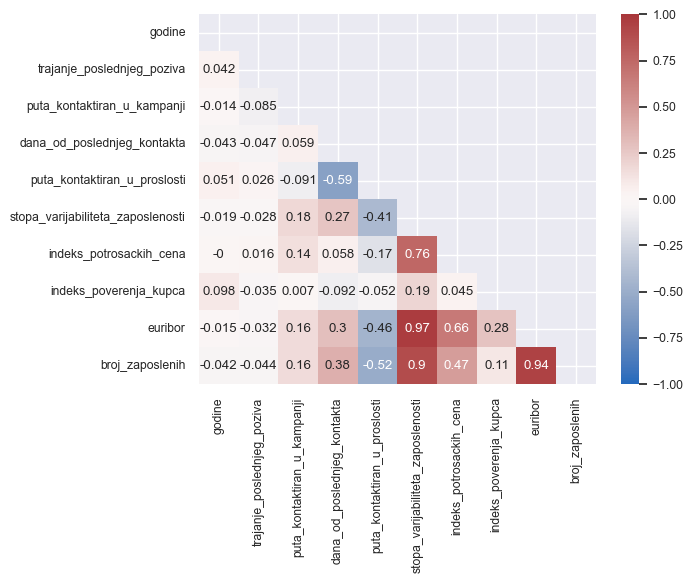

In [187]:
mask = np.triu(np.ones_like(matrica, dtype=bool))
sn.heatmap(round(matrica,3), annot=True,vmax=1,vmin=-1,center=0,cmap='vlag',mask=mask)
plt.show()

Sa matrice korelacije moze se uociti sledece:postoji visoka korelacija izmedju atributa <b>puta_kontaktiran_u_proslosti</b> i <b>dana_od_poslednjeg_kontakta</b> koja iznosi <b>-0,59</b>,<b>indeks_potrosackih_cena</b> i <b>stopa_varijabiliteta_zaposlenosti</b> koja iznosi <b>0,76</b>,<b>euribor</b> i <b>stopa_varijabiliteta_zaposlenosti</b> koja iznosi <b>0,97</b>,<b>euribor</b> i <b>indeks_potrosackih_cena</b> koji iznosi <b>0,66</b>,<b>broj_zaposlenih</b> i <b>puta_kontaktiran_u_proslosti</b> koji iznosi <b>-0,52</b>,<b>broj_zaposlenih</b> i <b>stopa_varijabiliteta_zaposlenosti</b> koji iznosi <b>0,9</b> i na kraju izmedju promenljivih <b>broj_zaposlenih</b> i <b>euribor</b> koji iznosi <b>0,94</b>

<b>Vizualizacije podataka i raspodele promenljivih</b>

In [188]:
lista_numerickih1=['godine','trajanje_poslednjeg_poziva','puta_kontaktiran_u_kampanji','dana_od_poslednjeg_kontakta']

<Axes: >

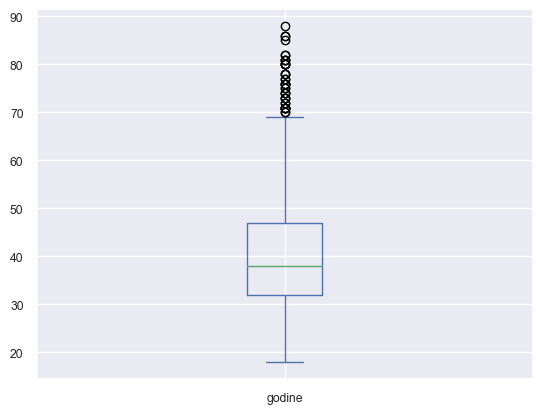

In [189]:
df['godine'].plot(kind='box')

array([[<Axes: title={'center': 'godine'}>,
        <Axes: title={'center': 'trajanje_poslednjeg_poziva'}>],
       [<Axes: title={'center': 'puta_kontaktiran_u_kampanji'}>,
        <Axes: title={'center': 'dana_od_poslednjeg_kontakta'}>]],
      dtype=object)

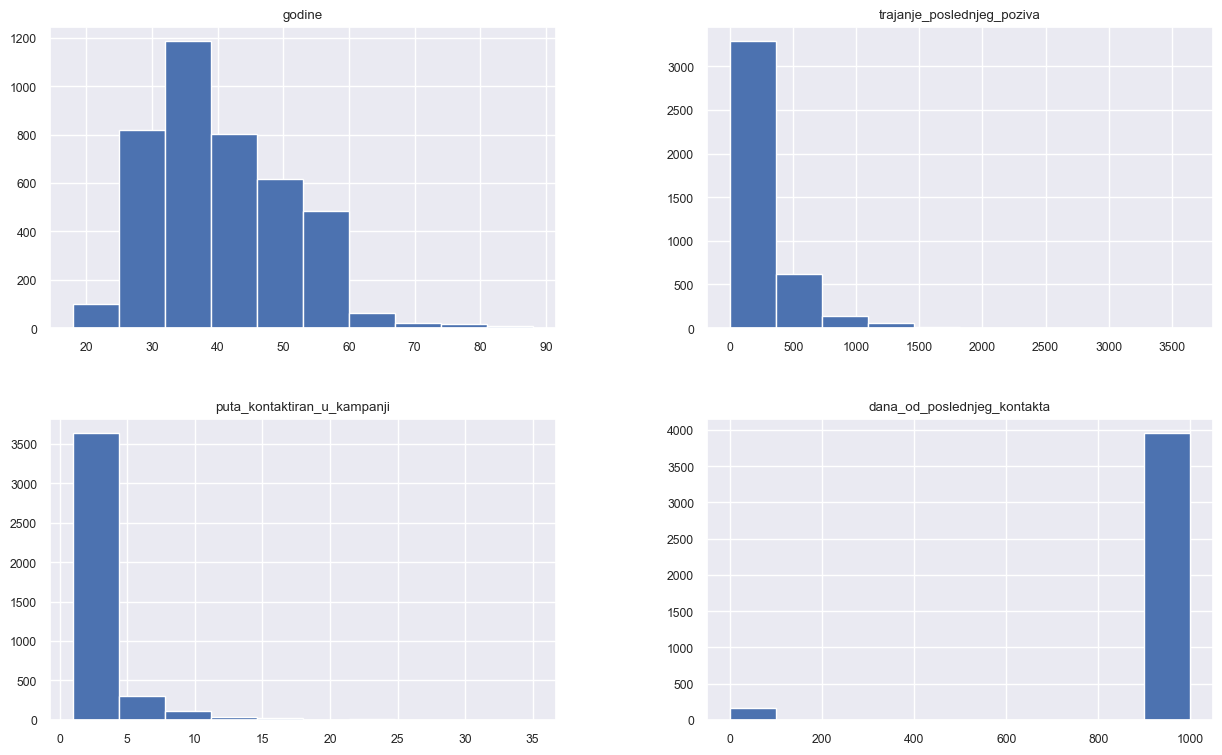

In [190]:
df[lista_numerickih1].hist(figsize=(15, 9))

In [191]:
#ZAKLJUCAK ZA GRAFOVE

In [192]:
lista_numerickih2=['puta_kontaktiran_u_proslosti','ishod_prethodnih_kampanja','stopa_varijabiliteta_zaposlenosti','indeks_potrosackih_cena','indeks_poverenja_kupca']

array([[<Axes: title={'center': 'puta_kontaktiran_u_proslosti'}>,
        <Axes: title={'center': 'stopa_varijabiliteta_zaposlenosti'}>],
       [<Axes: title={'center': 'indeks_potrosackih_cena'}>,
        <Axes: title={'center': 'indeks_poverenja_kupca'}>]], dtype=object)

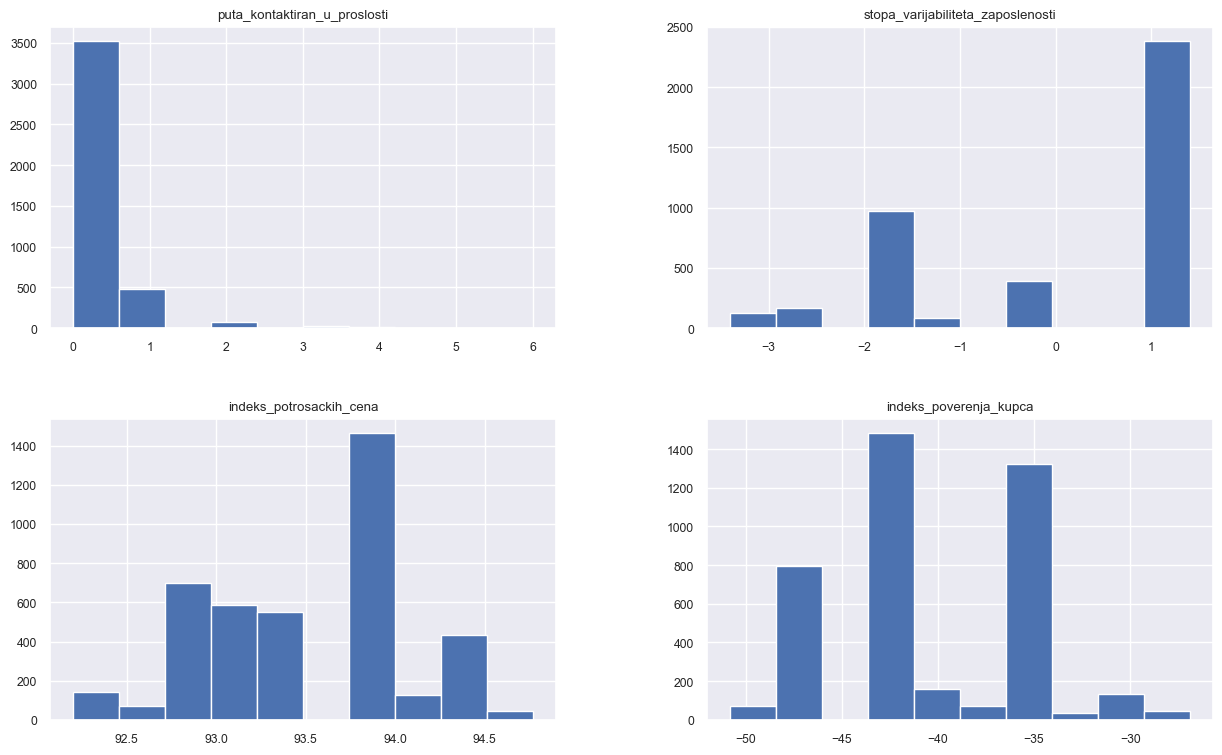

In [193]:
df[lista_numerickih2].hist(figsize=(15, 9))

In [194]:
#ZAKLJUCAK ZA GRAFOVE

<Axes: >

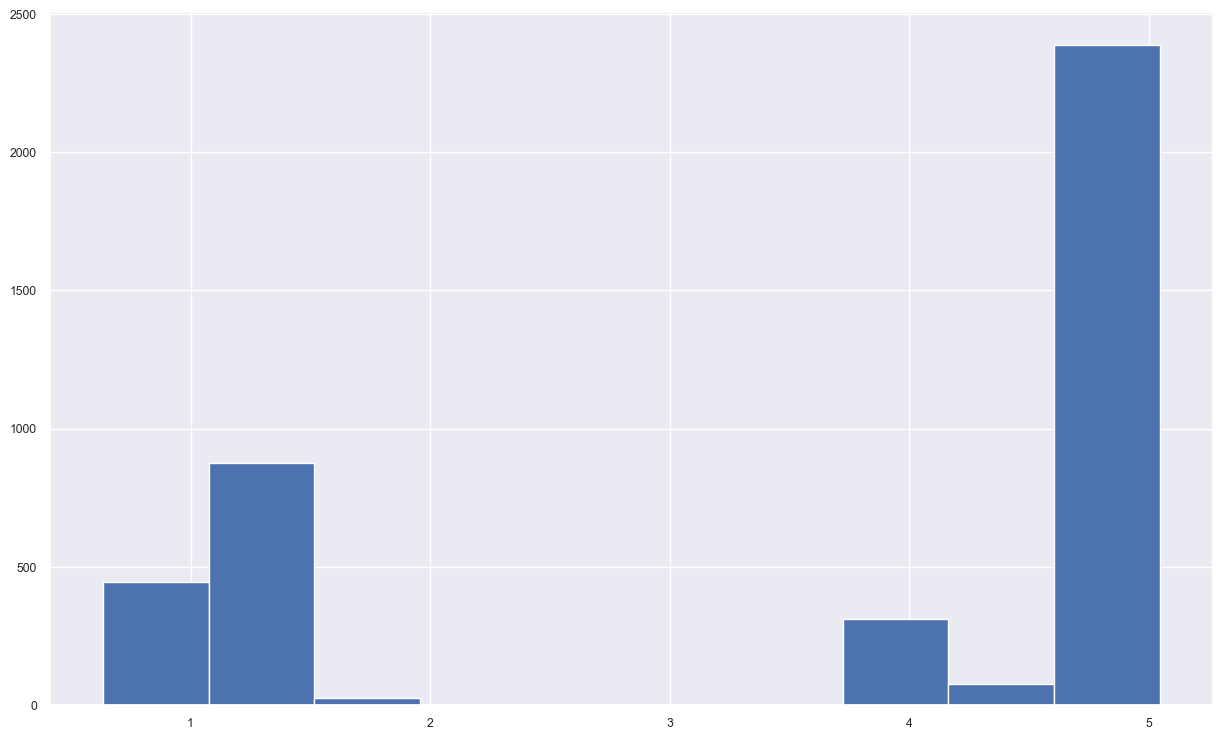

In [195]:
df['euribor'].hist(figsize=(15, 9))

<Axes: >

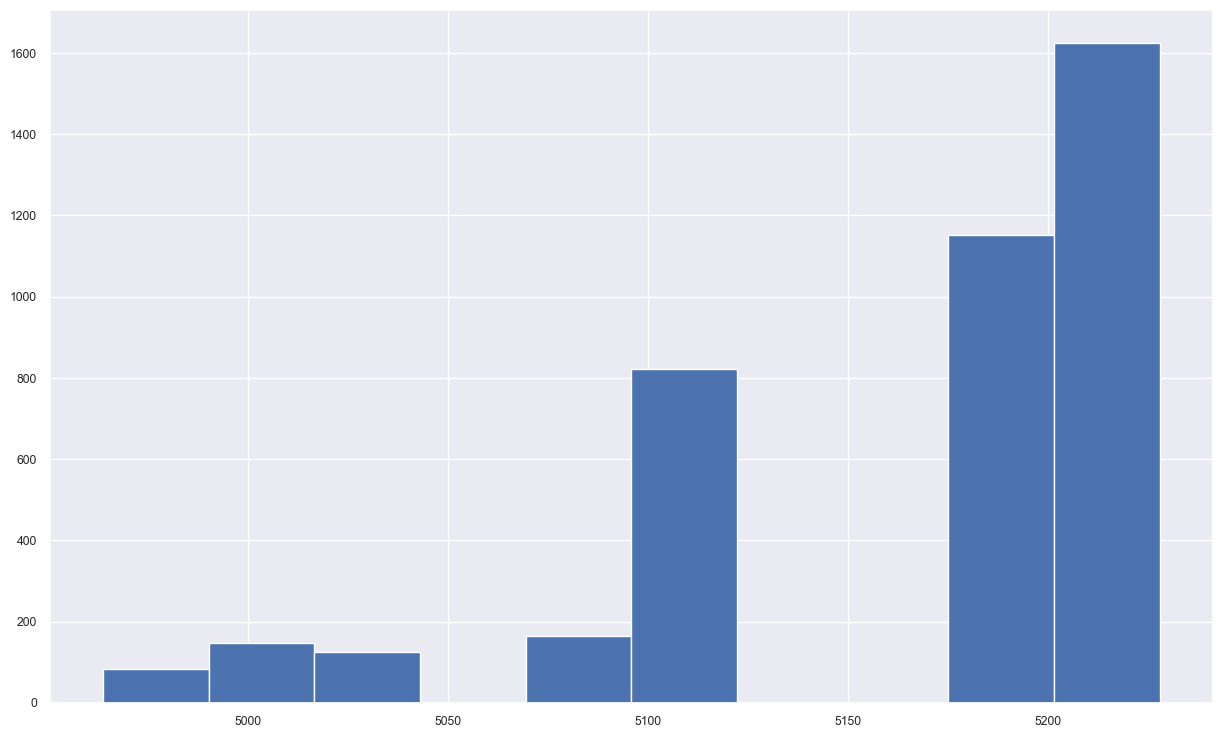

In [196]:
df['broj_zaposlenih'].hist(figsize=(15, 9))

In [197]:
#ZAKLJUCAK ZA GRAFOVE

<Axes: >

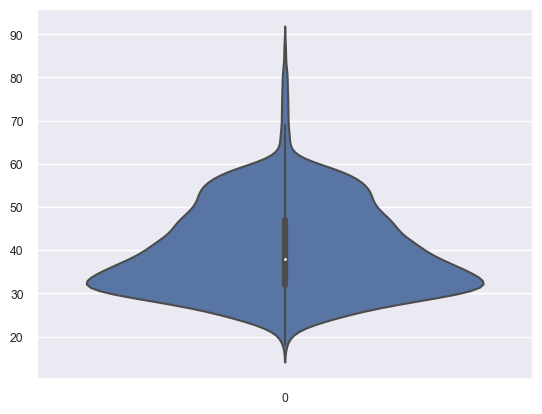

In [198]:
sn.violinplot(df['godine'])

In [199]:
#ZAKLJUCAK ZA GRAFOVE

In [200]:
lista_str=['tip_posla', 'bracni_status', 'obrazovanje','kasni_sa_isplatom',
              'stambeni_kredit','licni_kredit/zajam','vrsta_kontakta','mesec_poslednjeg_poziva','dan_poslednjeg_poziva','']

<Axes: xlabel='obrazovanje', ylabel='count'>

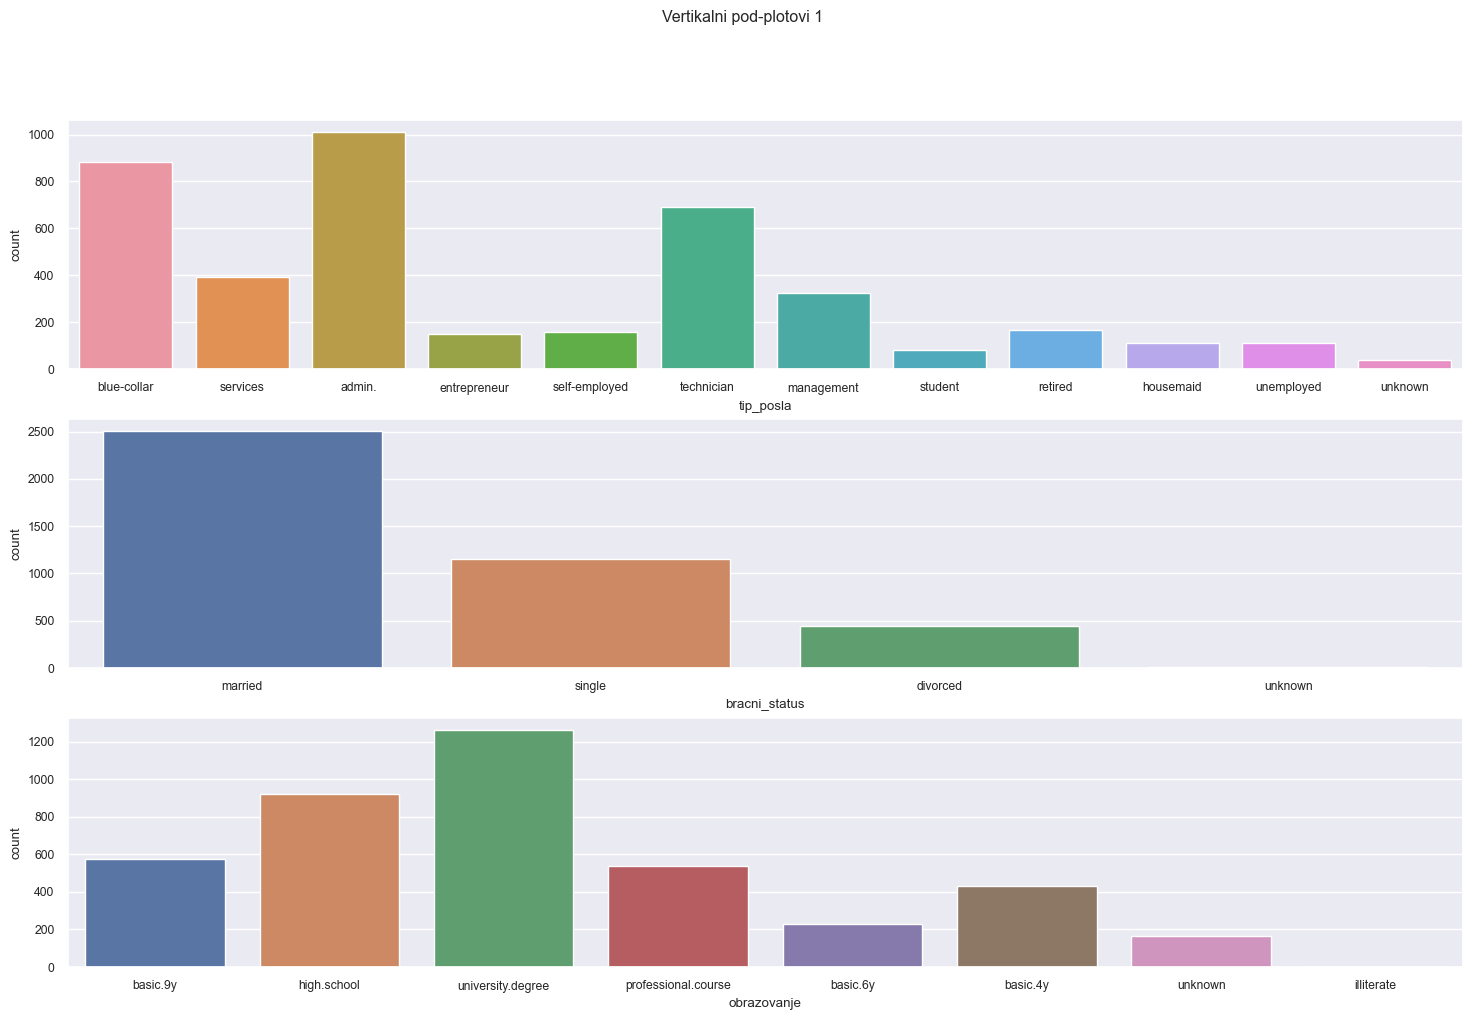

In [201]:
fig, axes = plt.subplots(3, 1, figsize=(18, 11))
fig.suptitle('Vertikalni pod-plotovi 1')
sn.countplot(x='tip_posla', data=df, ax=axes[0])
sn.countplot(x='bracni_status', data=df, ax=axes[1])
sn.countplot(x='obrazovanje', data=df, ax=axes[2])

In [202]:
#ZAKLUCAK

<Axes: xlabel='licni_kredit/zajam', ylabel='count'>

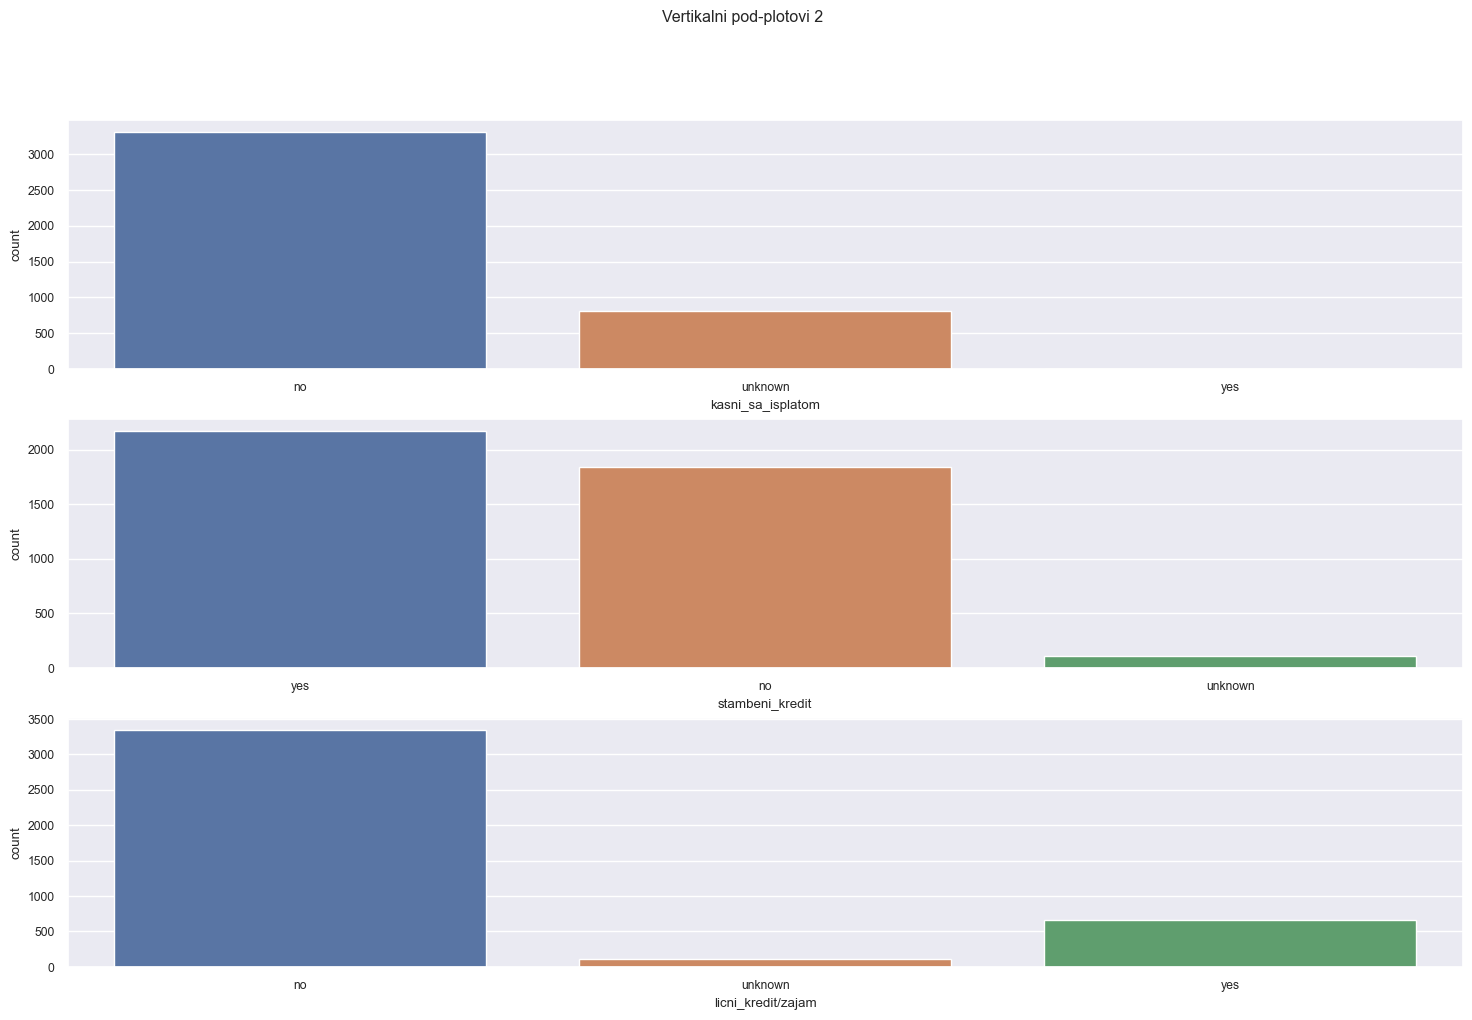

In [203]:
fig, axes = plt.subplots(3, 1, figsize=(18, 11))
fig.suptitle('Vertikalni pod-plotovi 2')
sn.countplot(x='kasni_sa_isplatom', data=df, ax=axes[0])
sn.countplot(x='stambeni_kredit', data=df, ax=axes[1])
sn.countplot(x='licni_kredit/zajam', data=df, ax=axes[2])

In [204]:
#ZAKLUCAK

<Axes: xlabel='ishod_prethodnih_kampanja', ylabel='count'>

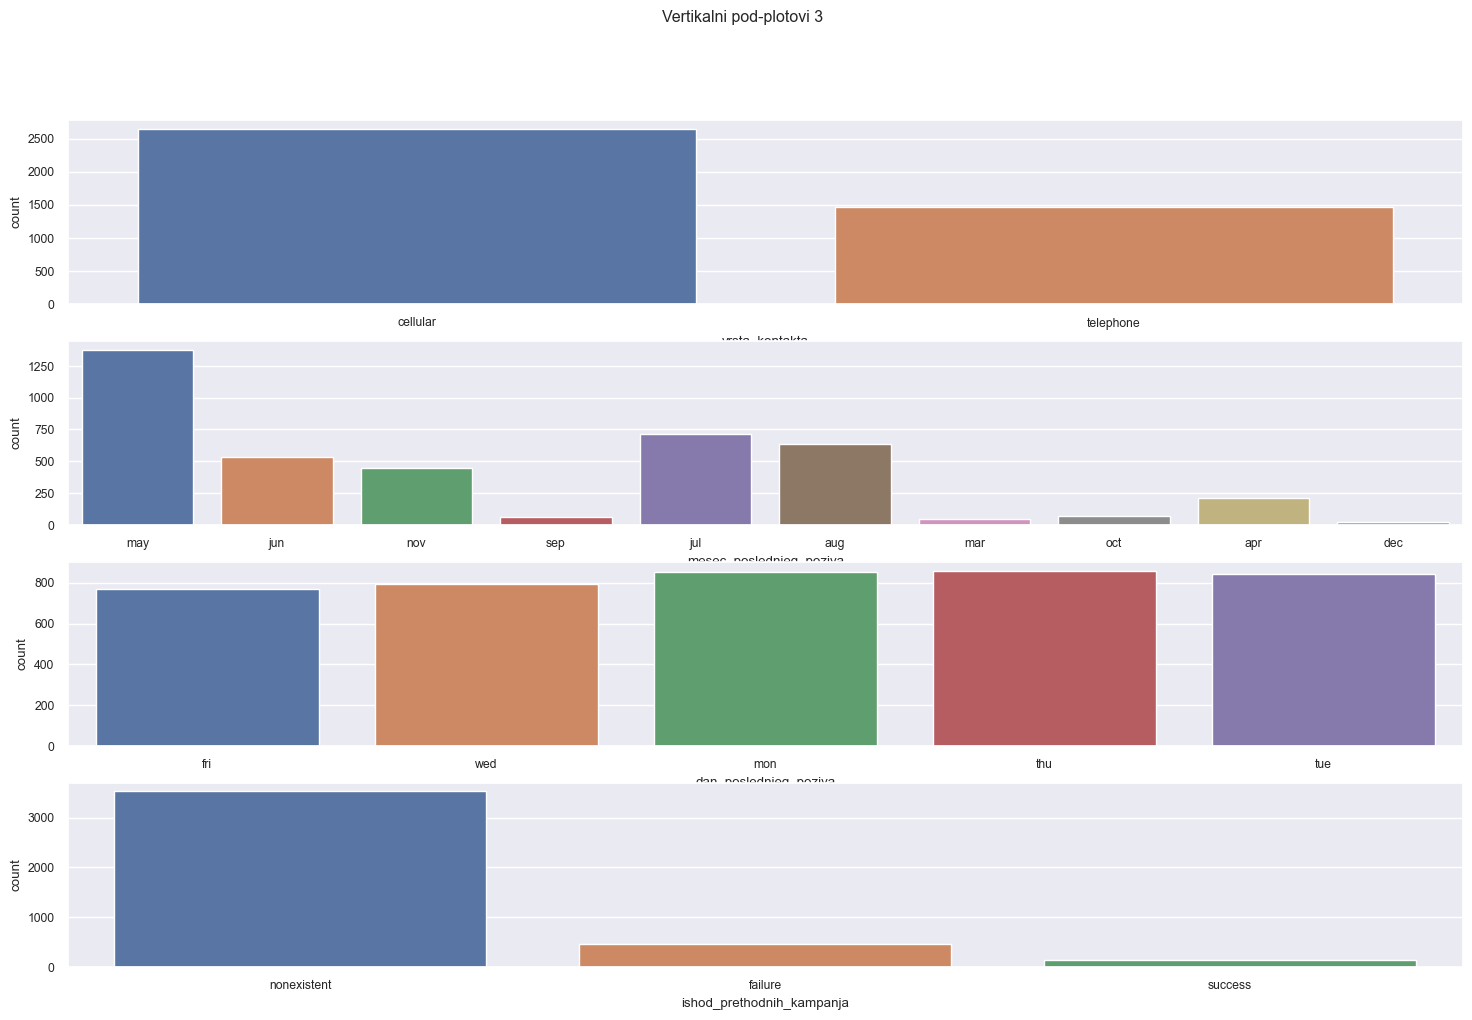

In [205]:
fig, axes = plt.subplots(4, 1, figsize=(18, 11))
fig.suptitle('Vertikalni pod-plotovi 3')
sn.countplot(x='vrsta_kontakta', data=df, ax=axes[0])
sn.countplot(x='mesec_poslednjeg_poziva', data=df, ax=axes[1])
sn.countplot(x='dan_poslednjeg_poziva', data=df, ax=axes[2])
sn.countplot(x='ishod_prethodnih_kampanja', data=df, ax=axes[3])

In [206]:
#ZAKLJUCAK

In [207]:
#KOMBINOVANI PLOTOVI

<b>PRIPREMA SKUPA PODATAKA ZA PREDIKTIVNO MODELOVANJE</b>

<b>Sredjivanje nedostajucih vrednosti</b>

U dokumentaciji je navadeno da kolona <b>trajanje_poslednjeg_poziva</b> u velikoj meri utice na izlaznu varijablu (ako je trajanje=0,izlaz='no'),pa se savetuje da se ona izbaci radi preciznosti modela

In [208]:
df = df.drop('trajanje_poslednjeg_poziva', axis = 1)

In [209]:
df.head()

,godine,tip_posla,bracni_status,obrazovanje,kasni_sa_isplatom,stambeni_kredit,licni_kredit/zajam,vrsta_kontakta,mesec_poslednjeg_poziva,dan_poslednjeg_poziva,puta_kontaktiran_u_kampanji,dana_od_poslednjeg_kontakta,puta_kontaktiran_u_proslosti,ishod_prethodnih_kampanja,stopa_varijabiliteta_zaposlenosti,indeks_potrosackih_cena,indeks_poverenja_kupca,euribor,broj_zaposlenih,orocio_depozit
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,2.0,999,0.0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,4.0,999,0.0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,1.0,999,0.0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,3.0,999,0.0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,1.0,999,0.0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


Najpre cemo dopuniti nedostajuce vrednosti za kategoricke promenljive.Za njih je neko opste pravilo da se nedostajuce vrednosti zamene vrednoscu koja se najcesce pojavljuje za dati atribut(ukoliko nema previse nedostajucih vrednosti u odnosu na velicinu dataset-a u kom slucaju mozemo dati atribut izbaciti iz daljeg razmatranja kako bi se izbeglo da modeli koje kreirano budu pretrenirani).

In [210]:
df.describe(include=['object'])

,tip_posla,bracni_status,obrazovanje,kasni_sa_isplatom,stambeni_kredit,licni_kredit/zajam,vrsta_kontakta,mesec_poslednjeg_poziva,dan_poslednjeg_poziva,ishod_prethodnih_kampanja,orocio_depozit
count,4119,4119,4119,4119,4119,4119,4119,4119,4119,4119,4119
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,1012,2509,1264,3315,2175,3349,2652,1378,860,3523,3668


In [211]:
df[df=="unknown"].count()

godine                                 0
tip_posla                             39
bracni_status                         11
obrazovanje                          167
kasni_sa_isplatom                    803
stambeni_kredit                      105
licni_kredit/zajam                   105
vrsta_kontakta                         0
mesec_poslednjeg_poziva                0
dan_poslednjeg_poziva                  0
puta_kontaktiran_u_kampanji            0
dana_od_poslednjeg_kontakta            0
puta_kontaktiran_u_proslosti           0
ishod_prethodnih_kampanja              0
stopa_varijabiliteta_zaposlenosti      0
indeks_potrosackih_cena                0
indeks_poverenja_kupca                 0
euribor                                0
broj_zaposlenih                        0
orocio_depozit                         0
dtype: int64

In [212]:
#Atribut tip_posla ima 39 nedostajucih vrednosti,a najcesca vrednost je admin.->1012 puta

In [213]:
df['tip_posla'] = df['tip_posla'].replace('unknown','admin.')

In [214]:
#Atribut bracni_status ima 11 nedostajucih vrednosti,a najcesca vrednost je married->2509 puta

In [215]:
df['bracni_status'] = df['bracni_status'].replace('unknown','married')

In [216]:
#Atribut obrazovanje ima 167 nedostajucih vrednosti,a najcesca vrednost je university.degree->1264 puta

In [217]:
df['obrazovanje'] = df['obrazovanje'].replace('unknown','university.degree')

In [218]:
#Atribut kasni_sa_isplatom ima 803 nedostajucih vrednosti,a najcesca vrednost je no->3315 puta

In [219]:
df = df.drop('kasni_sa_isplatom', axis = 1)

In [220]:
#Atribut stambeni_kredit ima 105 nedostajucih vrednosti,a najcesca vrednost je yes->2175 puta

In [221]:
df['stambeni_kredit'] = df['stambeni_kredit'].replace('unknown','yes')

In [222]:
#Atribut licni_kredit/zajam ima 105 nedostajucih vrednosti,a najcesca vrednost je no->3349 puta

In [223]:
#df = df.drop('licni_kredit/zajam', axis = 1)

Nakon sredjivanja kategorickih mozemo da predjemo na numericke varijable.Njihove nedostajuce vrednosti menjamo <b>medijanom</b> ukoliko varijabla nema normalnu raspodelu,a ako ih ima <b>modusom</b>(proveru raspodele radimo pomocu Sapirovog testa).

In [224]:
df.isna().sum()

godine                               0
tip_posla                            0
bracni_status                        0
obrazovanje                          0
stambeni_kredit                      0
licni_kredit/zajam                   0
vrsta_kontakta                       0
mesec_poslednjeg_poziva              0
dan_poslednjeg_poziva                0
puta_kontaktiran_u_kampanji          5
dana_od_poslednjeg_kontakta          0
puta_kontaktiran_u_proslosti         2
ishod_prethodnih_kampanja            0
stopa_varijabiliteta_zaposlenosti    3
indeks_potrosackih_cena              2
indeks_poverenja_kupca               3
euribor                              2
broj_zaposlenih                      1
orocio_depozit                       0
dtype: int64

In [225]:
#Atribut puta_kontaktiran_u_kampanji ima 5 nedostajucih vrednosti

In [226]:
sc.stats.shapiro(df['puta_kontaktiran_u_kampanji']) #Ima normalnu raspodelu

ShapiroResult(statistic=nan, pvalue=1.0)

In [227]:
df['puta_kontaktiran_u_kampanji'] = df['puta_kontaktiran_u_kampanji'].fillna(df['puta_kontaktiran_u_kampanji'].median())

In [228]:
#Atribut puta_kontaktiran_u_proslosti ima 2 nedostajuce vrednosti

In [229]:
sc.stats.shapiro(df['puta_kontaktiran_u_proslosti'])

ShapiroResult(statistic=nan, pvalue=1.0)

In [230]:
df['puta_kontaktiran_u_proslosti'] = df['puta_kontaktiran_u_proslosti'].fillna(df['puta_kontaktiran_u_proslosti'].median())

In [231]:
#Atribut stopa_varijabiliteta_zaposlenosti ima 3 nedostajuce vrednosti

In [232]:
sc.stats.shapiro(df['stopa_varijabiliteta_zaposlenosti'])

ShapiroResult(statistic=nan, pvalue=1.0)

In [233]:
df['stopa_varijabiliteta_zaposlenosti'] = df['stopa_varijabiliteta_zaposlenosti'].fillna(df['stopa_varijabiliteta_zaposlenosti'].median())

In [234]:
#Atribut indeks_potrosackih_cena ima 2 nedostajuce vrednosti

In [235]:
sc.stats.shapiro(df['indeks_potrosackih_cena'])

ShapiroResult(statistic=nan, pvalue=1.0)

In [236]:
df['indeks_potrosackih_cena'] = df['indeks_potrosackih_cena'].fillna(df['indeks_potrosackih_cena'].median())

In [237]:
#Atribut indeks_poverenja_kupca ima 3 nedostajuce vrednosti

In [238]:
sc.stats.shapiro(df['indeks_poverenja_kupca'])

ShapiroResult(statistic=nan, pvalue=1.0)

In [239]:
df['indeks_poverenja_kupca'] = df['indeks_poverenja_kupca'].fillna(df['indeks_poverenja_kupca'].median())

In [240]:
#Atribut euribor ima 2 nedostajuce vrednosti

In [241]:
sc.stats.shapiro(df['euribor'])

ShapiroResult(statistic=nan, pvalue=1.0)

In [242]:
df['euribor'] = df['euribor'].fillna(df['euribor'].median())

In [243]:
#Atribut broj_zaposlenih ima 1 nedostajucy vrednost

In [244]:
sc.stats.shapiro(df['broj_zaposlenih'])

ShapiroResult(statistic=nan, pvalue=1.0)

In [245]:
df['broj_zaposlenih'] = df['broj_zaposlenih'].fillna(df['broj_zaposlenih'].median())

<b>Kvantifikacija kategorickih atributa</b>

In [246]:
df.dtypes

godine                                 int64
tip_posla                             object
bracni_status                         object
obrazovanje                           object
stambeni_kredit                       object
licni_kredit/zajam                    object
vrsta_kontakta                        object
mesec_poslednjeg_poziva               object
dan_poslednjeg_poziva                 object
puta_kontaktiran_u_kampanji          float64
dana_od_poslednjeg_kontakta            int64
puta_kontaktiran_u_proslosti         float64
ishod_prethodnih_kampanja             object
stopa_varijabiliteta_zaposlenosti    float64
indeks_potrosackih_cena              float64
indeks_poverenja_kupca               float64
euribor                              float64
broj_zaposlenih                      float64
orocio_depozit                        object
dtype: object

In [247]:
df= df.replace({'stambeni_kredit' : {'no':0, 'yes':1}})

In [248]:
df= df.replace({'vrsta_kontakta' : {'telephone':0, 'cellular':1}})

In [249]:
df= df.replace({'orocio_depozit' : {'no':0, 'yes':1}})

In [250]:
df= df.replace({'bracni_status' : {'single':1, 'married':2,'divorced':3}})

In [251]:
df= df.replace({'dan_poslednjeg_poziva' : {'mon':1, 'tue':2,'wed':3,'thu':4,'fri':5}})

In [252]:
df= df.replace({'ishod_prethodnih_kampanja' : {'nonexistent':1, 'failure':2,'success':3}})

In [253]:
df['licni_kredit/zajam'].unique()

array(['no', 'unknown', 'yes'], dtype=object)

In [254]:
df= df.replace({'licni_kredit/zajam' : {'no':0, 'unknown':2,'yes':1}})

In [255]:
df['tip_posla'].unique()

array(['blue-collar', 'services', 'admin.', 'entrepreneur',
       'self-employed', 'technician', 'management', 'student', 'retired',
       'housemaid', 'unemployed'], dtype=object)

In [256]:
df= df.replace({'tip_posla' : {'blue-collar':0, 'services':1, 'admin.':2, 'entrepreneur':3,
       'self-employed':4, 'technician':5, 'management':6, 'student':7, 'retired':8,
       'housemaid':9, 'unemployed':10}})

In [257]:
df['obrazovanje'].unique()

array(['basic.9y', 'high.school', 'university.degree',
       'professional.course', 'basic.6y', 'basic.4y', 'illiterate'],
      dtype=object)

In [258]:
df= df.replace({'obrazovanje' : {'basic.9y':0, 'high.school':1, 'university.degree':2,
       'professional.course':3, 'basic.6y':4, 'basic.4y':5, 'illiterate':6}})

In [259]:
df['mesec_poslednjeg_poziva'].unique()

array(['may', 'jun', 'nov', 'sep', 'jul', 'aug', 'mar', 'oct', 'apr',
       'dec'], dtype=object)

In [260]:
df= df.replace({'mesec_poslednjeg_poziva' : {'may':5, 'jun':6, 'nov':11, 'sep':9, 'jul':7, 'aug':8, 'mar':3, 'oct':10, 'apr':4,
       'dec':12}})

In [261]:
df.head()

,godine,tip_posla,bracni_status,obrazovanje,stambeni_kredit,licni_kredit/zajam,vrsta_kontakta,mesec_poslednjeg_poziva,dan_poslednjeg_poziva,puta_kontaktiran_u_kampanji,dana_od_poslednjeg_kontakta,puta_kontaktiran_u_proslosti,ishod_prethodnih_kampanja,stopa_varijabiliteta_zaposlenosti,indeks_potrosackih_cena,indeks_poverenja_kupca,euribor,broj_zaposlenih,orocio_depozit
0,30,0,2,0,1,0,1,5,5,2.0,999,0.0,1,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,1,1,1,0,0,0,5,5,4.0,999,0.0,1,1.1,93.994,-36.4,4.855,5191.0,0
2,25,1,2,1,1,0,0,6,3,1.0,999,0.0,1,1.4,94.465,-41.8,4.962,5228.1,0
3,38,1,2,0,1,2,0,6,5,3.0,999,0.0,1,1.4,94.465,-41.8,4.959,5228.1,0
4,47,2,2,2,1,0,1,11,1,1.0,999,0.0,1,-0.1,93.200,-42.0,4.191,5195.8,0


In [92]:
df['ishod_prethodnih_kampanja']

0       1
1       1
2       1
3       1
4       1
       ..
4114    1
4115    1
4116    2
4117    1
4118    1
Name: ishod_prethodnih_kampanja, Length: 4119, dtype: int64

In [93]:
df.dtypes #Tip posla,obrazovanje,mesec treba proveriti kako da se kvantifikuju zbog broja vrednosi i da li da se izbaci licni kredit

godine                                 int64
tip_posla                             object
bracni_status                          int64
obrazovanje                           object
stambeni_kredit                        int64
licni_kredit/zajam                    object
vrsta_kontakta                         int64
mesec_poslednjeg_poziva               object
dan_poslednjeg_poziva                  int64
puta_kontaktiran_u_kampanji          float64
dana_od_poslednjeg_kontakta            int64
puta_kontaktiran_u_proslosti         float64
ishod_prethodnih_kampanja              int64
stopa_varijabiliteta_zaposlenosti    float64
indeks_potrosackih_cena              float64
indeks_poverenja_kupca               float64
euribor                              float64
broj_zaposlenih                      float64
orocio_depozit                         int64
dtype: object

<b>Kreiranje izvedenih atributa</b>

In [94]:
# KLASTEROVANJE

In [95]:
#Klasterovanje je postupak podele skupa na klastere(grupe) u kojima su elementi u istoj grupi slicni a izmedju njih razliciti. 
#Da bi imalo smisla deliti elemente treba da se svedu na istu meru(NORMALIZACIJA)

In [96]:
#Postoji vise nacina za normalizaciju podataka npr: RobustScaler

In [97]:
#Prvo uklanjamo suvisne kolone: Loan i housing jer imamo izvedenu za njih 2

In [99]:
df.drop(['licni_kredit/zajam','stambeni_kredit'], axis = 1, inplace = True)

In [100]:
kolone = df.columns

In [101]:
kolone

Index(['godine', 'tip_posla', 'bracni_status', 'obrazovanje', 'vrsta_kontakta',
       'mesec_poslednjeg_poziva', 'dan_poslednjeg_poziva',
       'puta_kontaktiran_u_kampanji', 'dana_od_poslednjeg_kontakta',
       'puta_kontaktiran_u_proslosti', 'ishod_prethodnih_kampanja',
       'stopa_varijabiliteta_zaposlenosti', 'indeks_potrosackih_cena',
       'indeks_poverenja_kupca', 'euribor', 'broj_zaposlenih',
       'orocio_depozit'],
      dtype='object')

In [102]:
df['dana_od_poslednjeg_kontakta'] = df['dana_od_poslednjeg_kontakta'].replace(999, -1)

In [103]:
#Zbog nerealne slike koja se stvarala vrednoscu 999, zamenili smo je sa vrednoscu -1, zbog bolje vizualizacije ekstremnih vrednosti

In [108]:
from sklearn.preprocessing import RobustScaler

In [109]:
scaler = RobustScaler()

In [152]:
df.head()

,godine,tip_posla,bracni_status,obrazovanje,vrsta_kontakta,mesec_poslednjeg_poziva,dan_poslednjeg_poziva,puta_kontaktiran_u_kampanji,dana_od_poslednjeg_kontakta,puta_kontaktiran_u_proslosti,ishod_prethodnih_kampanja,stopa_varijabiliteta_zaposlenosti,indeks_potrosackih_cena,indeks_poverenja_kupca,euribor,broj_zaposlenih,orocio_depozit
0,30,blue-collar,2,basic.9y,1,may,5,2.0,-1,0.0,1,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,services,1,high.school,0,may,5,4.0,-1,0.0,1,1.1,93.994,-36.4,4.855,5191.0,0
2,25,services,2,high.school,0,jun,3,1.0,-1,0.0,1,1.4,94.465,-41.8,4.962,5228.1,0
3,38,services,2,basic.9y,0,jun,5,3.0,-1,0.0,1,1.4,94.465,-41.8,4.959,5228.1,0
4,47,admin.,2,university.degree,1,nov,1,1.0,-1,0.0,1,-0.1,93.200,-42.0,4.191,5195.8,0


In [153]:
df_normalizovani = scaler.fit_transform(df)

ValueError: could not convert string to float: 'blue-collar'

In [111]:
df_normalizovani = pd.DataFrame(df_normalizovani, columns = df.columns)

NameError: name 'df_normalizovani' is not defined

In [112]:
df_normalizovani

NameError: name 'df_normalizovani' is not defined

In [113]:
kol = df_normalizovani.columns

NameError: name 'df_normalizovani' is not defined

In [114]:
plt.rcParams['figure.figsize']=[20,10]
plt.boxplot(df_normalizovani[kol].T)
plt.show()

NameError: name 'df_normalizovani' is not defined

In [115]:
df_normalizovani.columns 

NameError: name 'df_normalizovani' is not defined

In [116]:
#Sa slike uocavamo da godine, puta_kontaktiran_u_kampanji, dana_od_poslednjeg_kontakta, puta_kontaktiran_u_proslosti, indeks_poverenja_kupca imaju ekstremne vrednosti, pa cemo ih ukloniti

In [117]:
#Naredni korak je odredjivanje i otklanjanje ekstremnih vrednosti.

In [118]:
#Otklonicemo ih tako sto cemo postaviti granice preko odgovarajucih formula, i one van granica cemo otkloniti

In [119]:
#Izracunavamo kvartile koji su potrebni za formulu sa interkvartilnim granicama IQR

In [120]:
kvGodine25 = df_normalizovani['godine'].quantile(0.25)
kvIndeks_poverenja_kupca25 = df_normalizovani['indeks_poverenja_kupca'].quantile(0.25)
kvPuta_kontaktiran_u_kampanji25 = df_normalizovani['puta_kontaktiran_u_kampanji'].quantile(0.25)
kvPuta_kontaktiran_u_proslosti25 = df_normalizovani['puta_kontaktiran_u_proslosti'].quantile(0.25)
kvDana_od_poslednjeg_kontakta25 = df_normalizovani['dana_od_poslednjeg_kontakta'].quantile(0.25)

kvGodine75 = df_normalizovani['godine'].quantile(0.75)
kvIndeks_poverenja_kupca75 = df_normalizovani['indeks_poverenja_kupca'].quantile(0.75)
kvPuta_kontaktiran_u_kampanji75 = df_normalizovani['puta_kontaktiran_u_kampanji'].quantile(0.75)
kvPuta_kontaktiran_u_proslosti75 = df_normalizovani['puta_kontaktiran_u_proslosti'].quantile(0.75)
kvDana_od_poslednjeg_kontakta75 = df_normalizovani['dana_od_poslednjeg_kontakta'].quantile(0.75)

NameError: name 'df_normalizovani' is not defined

In [121]:
#Izracunavanjе IQR

In [122]:
iqrGodine = kvGodine75 - kvGodine25
iqrIndeks_poverenja_kupca = kvIndeks_poverenja_kupca75 - kvIndeks_poverenja_kupca25
iqrPuta_kontaktiran_u_kampanji = kvPuta_kontaktiran_u_kampanji75 - kvPuta_kontaktiran_u_kampanji25
iqrPuta_kontaktiran_u_proslosti = kvPuta_kontaktiran_u_proslosti75 - kvPuta_kontaktiran_u_proslosti25
iqrDana_od_poslednjeg_kontakta = kvDana_od_poslednjeg_kontakta75 - kvDana_od_poslednjeg_kontakta25

NameError: name 'kvGodine75' is not defined

In [123]:
#Utvrdjivanje granica i odstranjivanje ekstremnih vrednosti

In [125]:
granicaGodine = kvGodine75 + 1.5 * iqrGodine
granicaIndeks_poverenja_kupca = kvIndeks_poverenja_kupca75 + 1.5* iqrIndeks_poverenja_kupca
granicaPuta_kontaktiran_u_kampanji = kvPuta_kontaktiran_u_kampanji75 + 1.5 * iqrPuta_kontaktiran_u_kampanji
granicaPuta_kontaktiran_u_proslosti = kvPuta_kontaktiran_u_proslosti75 + 1.5 * iqrPuta_kontaktiran_u_proslosti
granicaDana_od_poslednjeg_kontakta = kvDana_od_poslednjeg_kontakta75 + 1.5 * iqrDana_od_poslednjeg_kontakta

NameError: name 'kvGodine75' is not defined

In [126]:
df_normalizovani = df_normalizovani.loc[df_normalizovani['godine']<granicaGodine]
df_normalizovani = df_normalizovani.loc[df_normalizovani['indeks_poverenja_kupca']<granicaIndeks_poverenja_kupca]
df_normalizovani = df_normalizovani.loc[df_normalizovani['puta_kontaktiran_u_kampanji']<granicaPuta_kontaktiran_u_kampanji]
#df_normalizovani = df_normalizovani.loc[df_normalizovani['puta_kontaktiran_u_proslosti']<granicaPuta_kontaktiran_u_proslosti]
#df_normalizovani = df_normalizovani.loc[df_normalizovani['dana_od_poslednjeg_kontakta']<granicaDana_od_poslednjeg_kontakta]

NameError: name 'df_normalizovani' is not defined

In [127]:
plt.rcParams['figure.figsize']=[20,10]
plt.boxplot(df_normalizovani[kolone].T)
plt.show()

NameError: name 'df_normalizovani' is not defined

In [128]:
df_normalizovani.columns

NameError: name 'df_normalizovani' is not defined

In [130]:
df_normalizovani['dana_od_poslednjeg_kontakta'].value_counts()

NameError: name 'df_normalizovani' is not defined

In [131]:
df_normalizovani['puta_kontaktiran_u_proslosti'].value_counts()

NameError: name 'df_normalizovani' is not defined

In [132]:
#Atributi dana_od_poslednjeg_kontakta i puta_kontaktiran_u_proslosti nisu pogodni za otklanjanje ekstremnih vrednosti, pa ni za klasteroanje. Zato ih odstranjujemo.

In [133]:
df_normalizovani.drop(['dana_od_poslednjeg_kontakta','puta_kontaktiran_u_proslosti'], axis = 1, inplace = True)

NameError: name 'df_normalizovani' is not defined

In [134]:
kolone = df_normalizovani.columns

NameError: name 'df_normalizovani' is not defined

In [135]:
plt.rcParams['figure.figsize']=[20,10]
plt.boxplot(df_normalizovani[df_normalizovani.columns].T)
plt.show()

NameError: name 'df_normalizovani' is not defined

In [136]:
#Sada cemo raditi normalizaciju bez ekstremnih vrednosti.

In [138]:
df_normalizovani = scaler.fit_transform(df_normalizovani)

NameError: name 'df_normalizovani' is not defined

In [139]:
df_normalizovani = pd.DataFrame(df_normalizovani, columns = kolone)

NameError: name 'df_normalizovani' is not defined

In [140]:
plt.rcParams['figure.figsize']=[20,10]
plt.boxplot(df_normalizovani[kolone].T)
plt.show()

NameError: name 'df_normalizovani' is not defined

In [141]:
# К means

In [142]:
from sklearn.cluster import KMeans

In [143]:
algoritam = KMeans(n_clusters = 3, max_iter = 100, random_state=13)
df_bez_y = df_normalizovani.iloc[:, :-1] 
klaster_model = algoritam.fit(df_bez_y)
centroidi = klaster_model.cluster_centers_
klasteri = klaster_model.predict(df_bez_y)
df_bez_y['Cluster'] = klasteri
df_normalizovani['Cluster'] = klasteri

NameError: name 'df_normalizovani' is not defined

In [144]:
kolone1 = df_bez_y.columns
kolone1

NameError: name 'df_bez_y' is not defined

In [145]:
plt.rcParams['figure.figsize']=[20,10]
plt.plot(centroidi[0,:], c = 'r')
plt.plot(centroidi[1,:], c = 'b')
plt.plot(centroidi[2,:], c = 'g')
plt.xticks(list(range(45)), kolone1, rotation='vertical')
plt.show()

NameError: name 'centroidi' is not defined

In [146]:
#Klasteri su oznaceni crvenom, plavom i zelenom bojom.

In [147]:
#Dobili smo vrednosti za 3 razlicita klastera koji se po nekim atributima podudaraju, a negde i nemamo mnogo poklapanja 
#na primer za atribut vrsta kontakta i mesec u kome su kontaktirani


In [148]:
# OCENA MODELA

In [149]:
from sklearn.metrics import silhouette_score
silhouette_score(df_bez_y , klaster_model.labels_)

NameError: name 'df_bez_y' is not defined

In [150]:
#Jako niska ocena, stoga treba odraditi odredjene izmene na nasem modelu

In [151]:
#Da bismo promenili rezultate klasterovanja moramo da odstranmo pojedine atribute koji generisu te rezultate
#Odabracemo one cije su vrednosti slicne za sve klastere jer je cilj klasterovanja da vrednosti u razlicitim klasterima budu
#sto razlicitije

In [ ]:
#Kolone koje cemo odstraniti su: age, campaign, izvedena, job_admin.,job_entrepreneur,job_housemaid,job_management,job_retired,
#job_self-employed,job_services,marital_divorced,education_illiterate